In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [7]:
sample_data = [
    ("Laptop", 5, 800.00),
    ("Phone", 10, 500.00),
    ("Tablet", 7, 300.00),
    ("Headphones", 15, 50.00),
    ("Charger", 20, 20.00),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

In [9]:
print("sales_data.db created and sample data inserted.")

sales_data.db created and sample data inserted.


In [11]:
conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

In [13]:
print("Sales Table:")
print(df)

Sales Table:
      product  total_qty  revenue
0     Charger         20    400.0
1  Headphones         15    750.0
2      Laptop          5   4000.0
3       Phone         10   5000.0
4      Tablet          7   2100.0


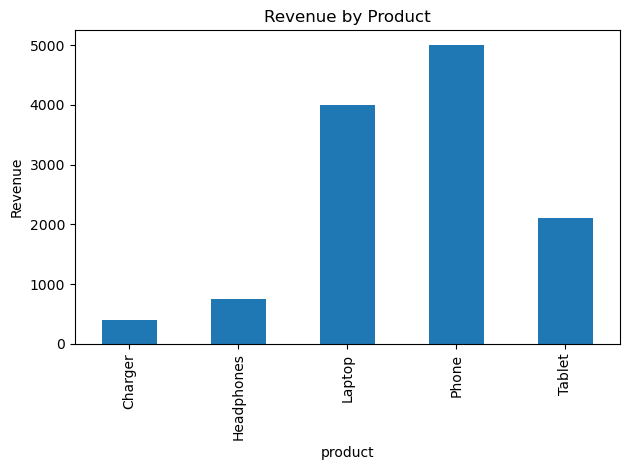

In [15]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()

plt.show()